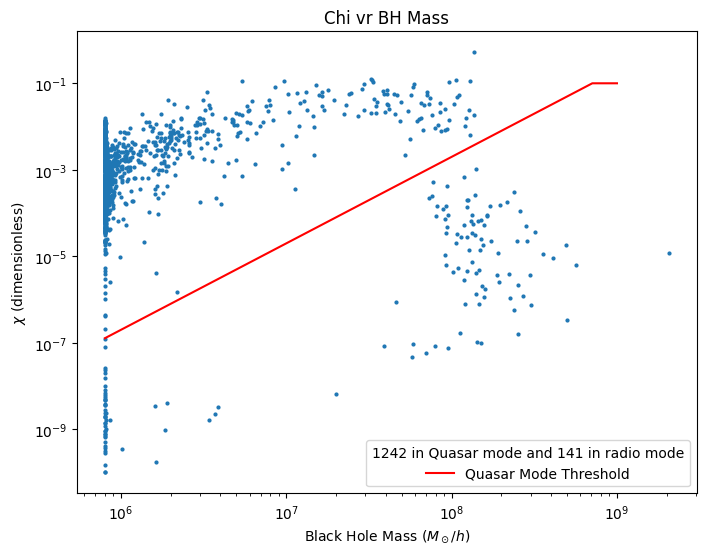

In [33]:
import h5py
import numpy as np 
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
from astropy.constants import mu0

file_path = "./data/Output-fidTNG_CAMELS/snap_032.hdf5"
f_catalog = "./data/Output-fidTNG_CAMELS/fof_subhalo_tab_032.hdf5"

data = h5py.File(file_path, "r") 
f = h5py.File(f_catalog, 'r')  

BH_MdotBondi = data["PartType5/BH_MdotBondi"][:] * 1e10  
BH_MdotEddington = data["PartType5/BH_MdotEddington"][:] * 1e10
Ed_ratio = BH_MdotBondi/BH_MdotEddington

BH_Mass = data["PartType5/BH_Mass"][:] * 1e10
RM_Egy = data["PartType5/BH_CumEgyInjection_RM"][:] * 1e10
QM_Egy = data["PartType5/BH_CumEgyInjection_QM"][:] * 1e10


plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Black Hole Mass ($M_\odot / h$)')
plt.ylabel('$\chi$ (dimensionless)')
plt.title('Chi vr BH Mass')
plt.scatter(BH_Mass, Ed_ratio, s = 4)

m_bh = np.linspace (8 * 1e5, 1e9, 5000)
chi_0 = 0.002
beta = 2

chi_threshold = chi_0 * (m_bh / 1e8)**beta

chi_threshold[chi_threshold > 0.1] = 0.1

plt.plot(m_bh, chi_threshold, label="Quasar Mode Threshold", color='r')

chi_sim_BH = chi_0 * (BH_Mass / 1e8)**beta
num_Quasar_mode = 0 

for i,ratio in enumerate(Ed_ratio):    
    if ratio > chi_sim_BH[i]:
        num_Quasar_mode += 1

num_Radio_mode = np.size(BH_Mass) - num_Quasar_mode

plt.legend(title = str(num_Quasar_mode) + " in Quasar mode and " + str(num_Radio_mode) + " in radio mode")
#Add another pannel below of cumulative energy 
#Compair Output-1M-BH_accsimba_seedcri-SF_ and Output-1M-BH_accsimba-SF_ in term of steller mass to halo mass

[4.0399015e+18 4.3508540e+07 0.0000000e+00 ... 5.4974988e+10 1.2558649e+10
 2.7192212e+13]


/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119872 (\N{MATHEMATICAL ITALIC CAPITAL M}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119888 (\N{MATHEMATICAL ITALIC SMALL C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119896 (\N{MATHEMATICAL ITALIC SMALL K}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119901 (\N{MATHEMATICAL ITALIC SMALL P}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11986

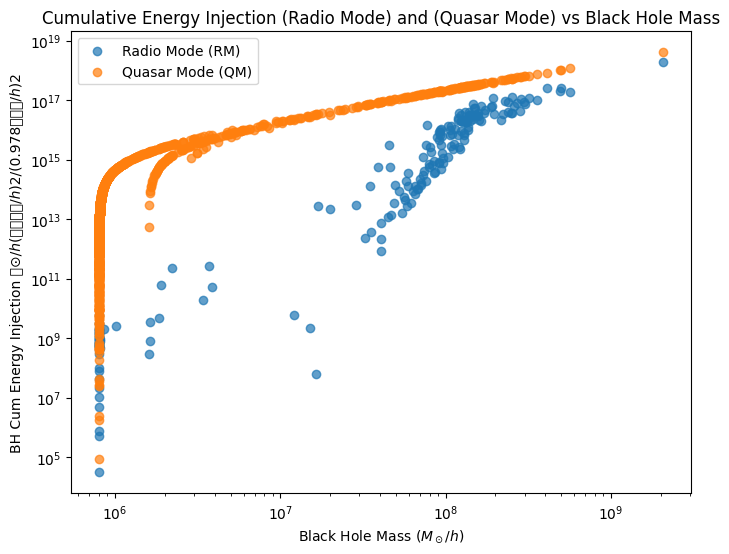

In [32]:
plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Black Hole Mass ($M_\odot / h$)')
plt.ylabel('BH Cum Energy Injection 𝑀⊙/ℎ(𝑐𝑘𝑝𝑐/ℎ)2/(0.978𝐺𝑦𝑟/ℎ)2')
plt.title('Cumulative Energy Injection (Radio Mode) and (Quasar Mode) vs Black Hole Mass') 

print(QM_Egy)
plt.scatter(BH_Mass, RM_Egy, label='Radio Mode (RM)', alpha=0.7)
plt.scatter(BH_Mass, QM_Egy, label='Quasar Mode (QM)', alpha=0.7)

plt.legend()

plt.show()